# Notebook for visualizing the results of a stylegan3 training


In [1]:
import os

dataset_name = f"MNIST"

results_dir = f"training-runs/{dataset_name.upper()}"
experiment_name = f"00000-stylegan3-t-{dataset_name}-gpus1-batch32-gamma0.125"

file_name = "stats.jsonl"

file_path = os.path.join(results_dir, experiment_name, file_name)
if not os.path.isfile(file_path):
    print(f"Error: The file {file_path} does not exist.")

# Labels for the classes
class_labels = list(range(10))
print(f"Class labels: {class_labels}")


Class labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [2]:
from visualization_utils import read_jsonl, extract_metrics, extract_classification_metrics, format_time, summarize_training_stats, \
    summarize_training_options, extract_confusion_matrix, plot_confusion_matrix, plot_metric, print_accuracies_per_class, \
    compute_avg_accuracy, compute_overall_accuracy, plot_accuracies, extract_best_tick, class_colors

In [3]:
jsonl_data = read_jsonl(file_path)
metrics = extract_metrics(jsonl_data, class_labels=class_labels)
summarize_training_stats(metrics, exclude_first_tick=True)

🕒 Total time: 7h 20min 11s
📊 Total kimg: 300.512
📈 Total ticks: 30
⏱️ Mean time per tick: 14min 5s (std: 3s)
⏳ Mean time per kimg: 1min 24s (std: 0s)


In [4]:
print("────────────────────────────────────")
print("Using average accuracy as performance key")
print("────────────────────────────────────")
best_tick_performance = extract_best_tick(
    jsonl_data, class_labels, performance_key="avg", verbose=True, only_tick_with_pkl=False, network_snapshot_ticks=None
)

────────────────────────────────────
Using average accuracy as performance key
────────────────────────────────────
📊 Best Tick Performance Summary
────────────────────────────────────
⏱️  Tick: 23
🖼️  kimg: 230.400
📈 Avg Accuracy (Train): 0.8580 ± 0.0638
📊 Avg Accuracy (Val):   0.9771 ± 0.0073
🏁 Overall Accuracy (Train): 0.8594
✅ Overall Accuracy (Val):   0.9772


In [5]:
print("\n────────────────────────────────────")
print("Using overall accuracy as performance key")
print("────────────────────────────────────")
best_tick_performance = extract_best_tick(
    jsonl_data,
    class_labels,
    performance_key="overall",
    verbose=True,
    only_tick_with_pkl=False,
    network_snapshot_ticks=None,
)


────────────────────────────────────
Using overall accuracy as performance key
────────────────────────────────────
📊 Best Tick Performance Summary
────────────────────────────────────
⏱️  Tick: 23
🖼️  kimg: 230.400
📈 Avg Accuracy (Train): 0.8580 ± 0.0638
📊 Avg Accuracy (Val):   0.9771 ± 0.0073
🏁 Overall Accuracy (Train): 0.8594
✅ Overall Accuracy (Val):   0.9772


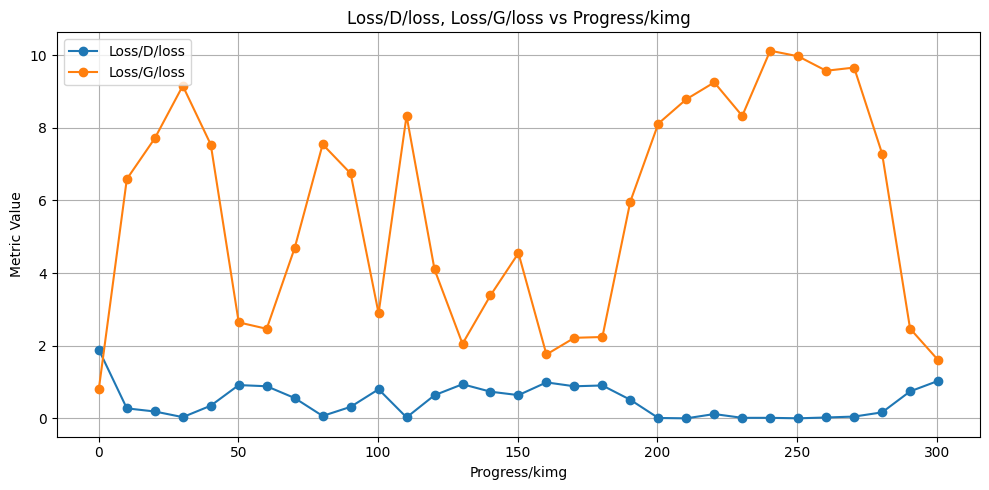

In [6]:
plot_metric(metrics, metrics=["Loss/D/loss", "Loss/G/loss"], x_axis="Progress/kimg")

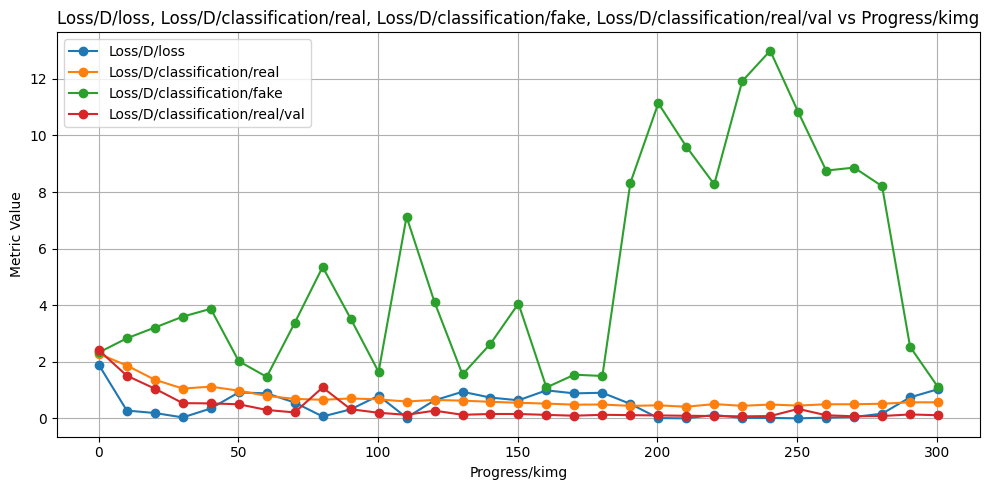

In [7]:
plot_metric(
    data=metrics,
    metrics=[
        "Loss/D/loss",
        "Loss/D/classification/real",
        "Loss/D/classification/fake",
        "Loss/D/classification/real/val",
    ],
    x_axis="Progress/kimg",
)

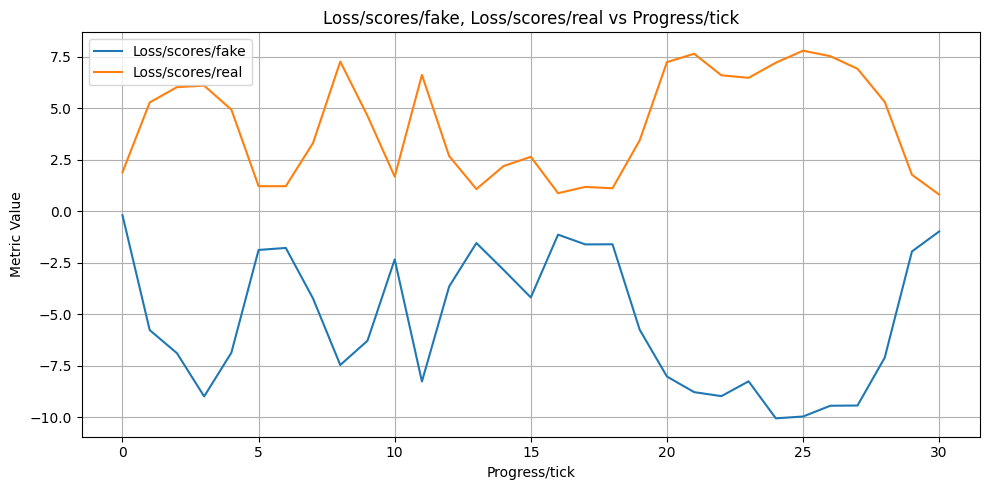

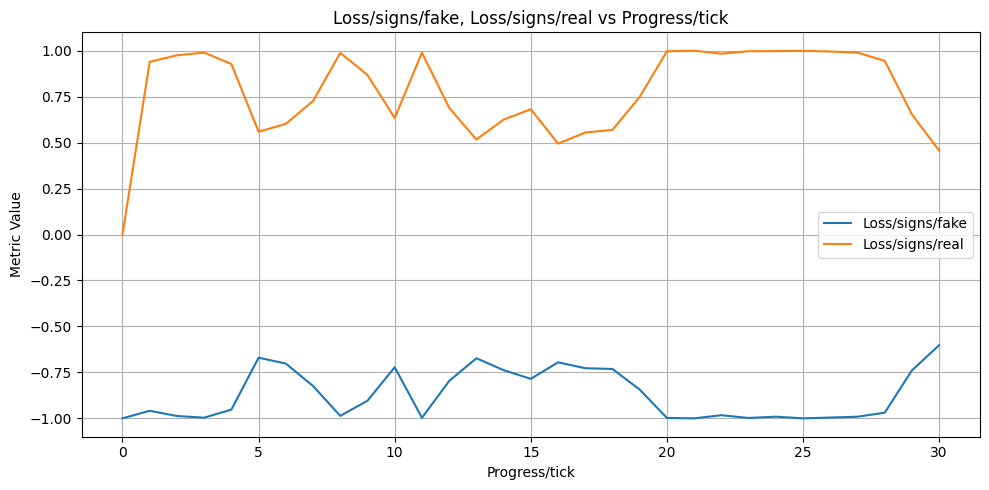

In [8]:
plot_metric(metrics, metrics=["Loss/scores/fake", "Loss/scores/real"], x_axis="Progress/tick", marker=None)
plot_metric(metrics, metrics=["Loss/signs/fake", "Loss/signs/real"], x_axis="Progress/tick", marker=None)

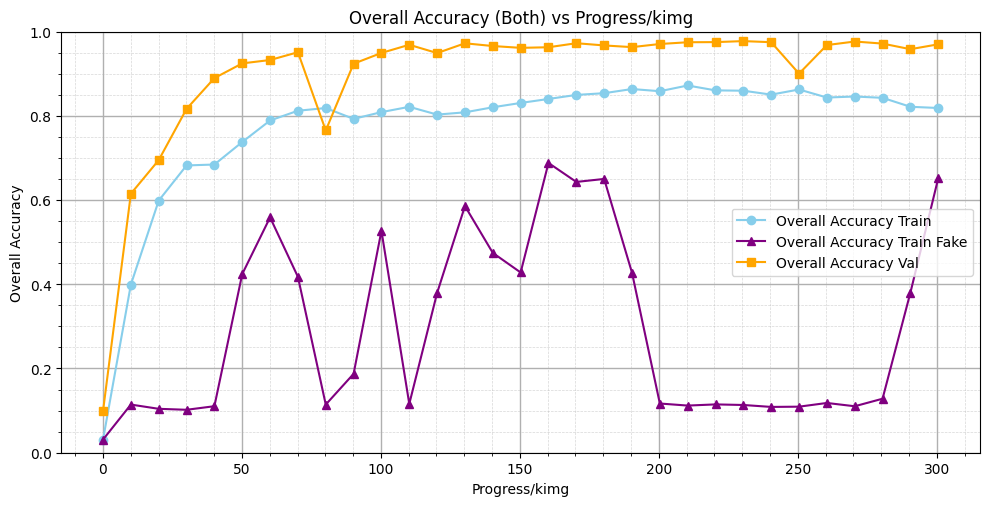

In [9]:
classification_metrics = extract_classification_metrics(jsonl_data, class_labels=class_labels)
metrics["overall_accuracy_train"], metrics["overall_accuracy_val"], metrics["overall_accuracy_train_fake"] = (
    compute_overall_accuracy(classification_metrics)
)
plot_accuracies(
    metrics,
    class_labels=class_labels,
    plot_std_in_avg_accuracy=False,
    plot_type="overall",
    dataset="both",
    include_fake=True,
)

Last 10 accuracies per class (val):
Class 0: ['0.990', '0.993', '0.991', '0.988', '0.992', '0.992', '0.998', '0.993', '0.992', '0.996']
Class 1: ['0.990', '0.986', '0.985', '0.980', '0.998', '0.993', '0.991', '0.995', '0.995', '0.993']
Class 2: ['0.991', '0.971', '0.974', '0.980', '0.950', '0.927', '0.992', '0.977', '0.982', '0.969']
Class 3: ['0.981', '0.985', '0.982', '0.983', '0.884', '0.965', '0.964', '0.984', '0.962', '0.958']
Class 4: ['0.969', '0.978', '0.981', '0.953', '0.974', '0.980', '0.979', '0.970', '0.924', '0.940']
Class 5: ['0.944', '0.985', '0.973', '0.979', '0.936', '0.936', '0.970', '0.916', '0.981', '0.960']
Class 6: ['0.965', '0.932', '0.978', '0.956', '0.812', '0.992', '0.974', '0.973', '0.986', '0.960']
Class 7: ['0.987', '0.975', '0.972', '0.961', '0.987', '0.948', '0.989', '0.973', '0.874', '0.970']
Class 8: ['0.953', '0.986', '0.970', '0.980', '0.514', '0.986', '0.978', '0.973', '0.980', '0.973']
Class 9: ['0.967', '0.956', '0.965', '0.985', '0.929', '0.956', 

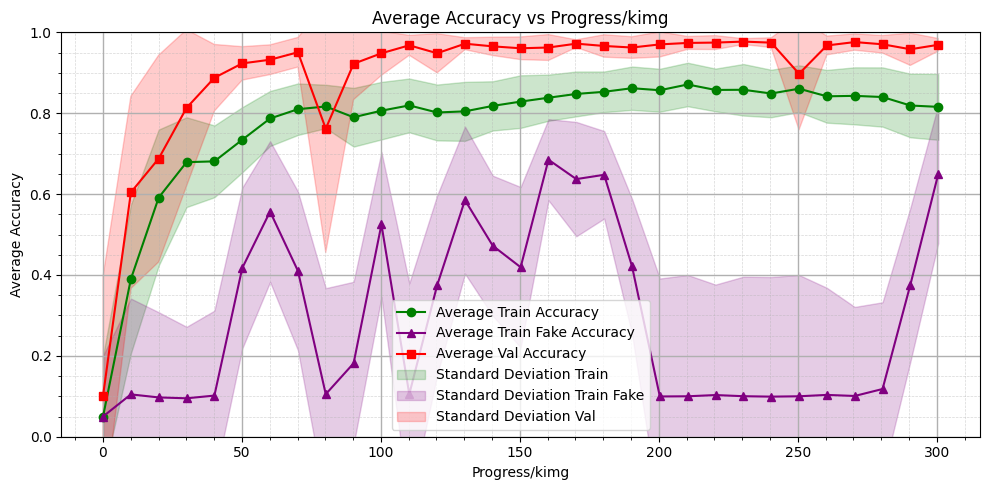

In [10]:
print_accuracies_per_class(metrics, class_labels, last_ticks=10, data_type="val")
plot_accuracies(
    metrics,
    class_labels=class_labels,
    plot_std_in_avg_accuracy=True,
    plot_type="average",
    dataset="both",
    include_fake=True,
)

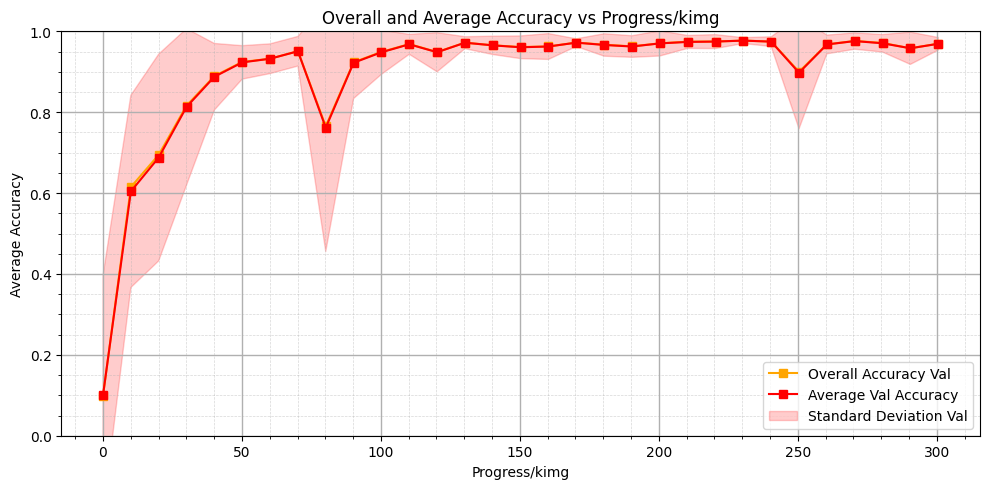

In [11]:
plot_accuracies(
    metrics,
    class_labels=class_labels,
    plot_std_in_avg_accuracy=True,
    plot_type="both",
    dataset="val",
)

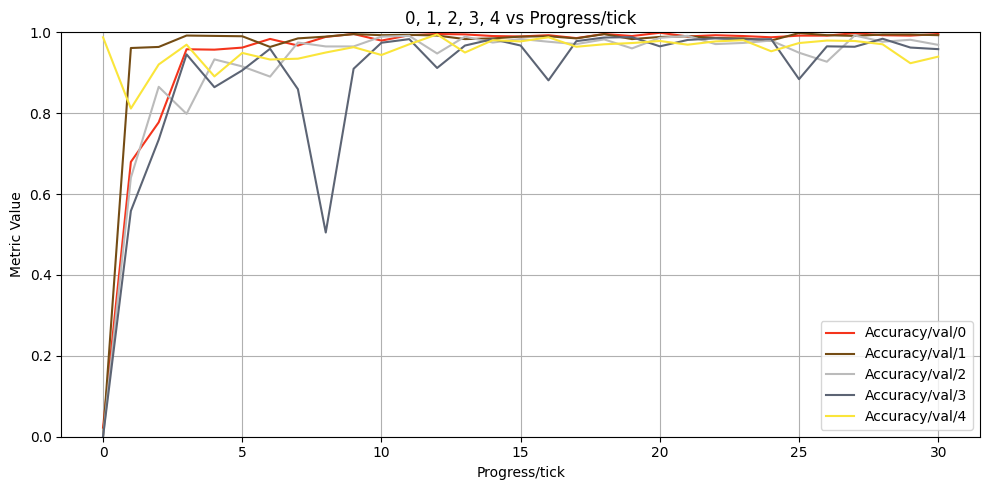

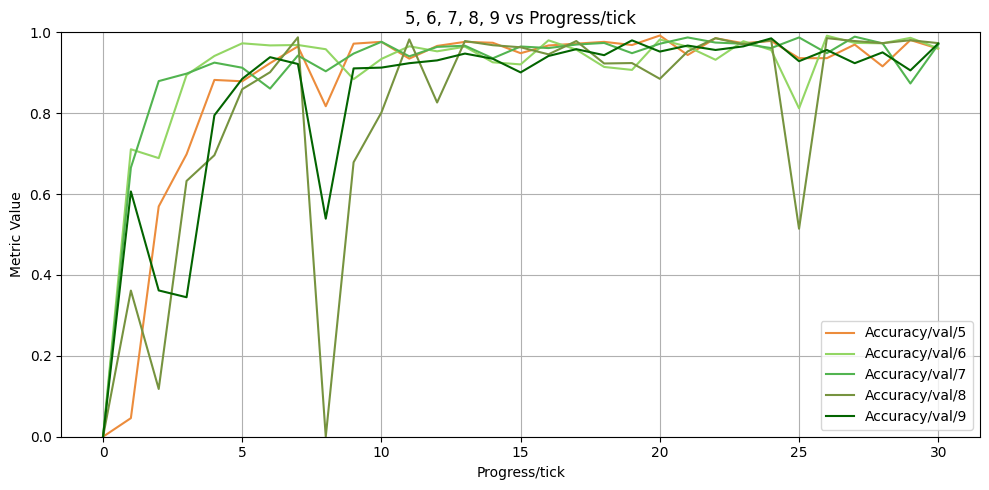

In [12]:
if "oitaven" in experiment_name:
    minority_class_labels = [1, 2, 3, 4, 5]
    colors = [class_colors[c] for c in minority_class_labels]
    plot_metric(
        metrics,
        metrics=[f"Accuracy/val/{c}" for c in minority_class_labels],
        x_axis="Progress/tick",
        marker=None,
        ylim=(0, 1),
        colors=colors,
        title="Terra, Pedras, Asfalto, Formigón, Tellados vs Progress/tick",
    )
    mayority_class_labels = [0, 6, 7, 8, 9]
    colors = [class_colors[c] for c in mayority_class_labels]
    plot_metric(
        metrics,
        metrics=[f"Accuracy/val/{c}" for c in mayority_class_labels],
        x_axis="Progress/tick",
        marker=None,
        ylim=(0, 1),
        colors=colors,
        title="Auga, Prados, Árbores Nativas, Piñeiros, Eucaliptos vs Progress/tick",
    )
else:
    first_class_labels = [0, 1, 2, 3, 4]
    colors = [class_colors[c] for c in first_class_labels]
    plot_metric(
        metrics,
        metrics=[f"Accuracy/val/{c}" for c in first_class_labels],
        x_axis="Progress/tick",
        marker=None,
        ylim=(0, 1),
        colors=colors,
        title="0, 1, 2, 3, 4 vs Progress/tick",
    )
    last_class_labels = [5, 6, 7, 8, 9]
    colors = [class_colors[c] for c in last_class_labels]
    plot_metric(
        metrics,
        metrics=[f"Accuracy/val/{c}" for c in last_class_labels],
        x_axis="Progress/tick",
        marker=None,
        ylim=(0, 1),
        colors=colors,
        title="5, 6, 7, 8, 9 vs Progress/tick",
    )

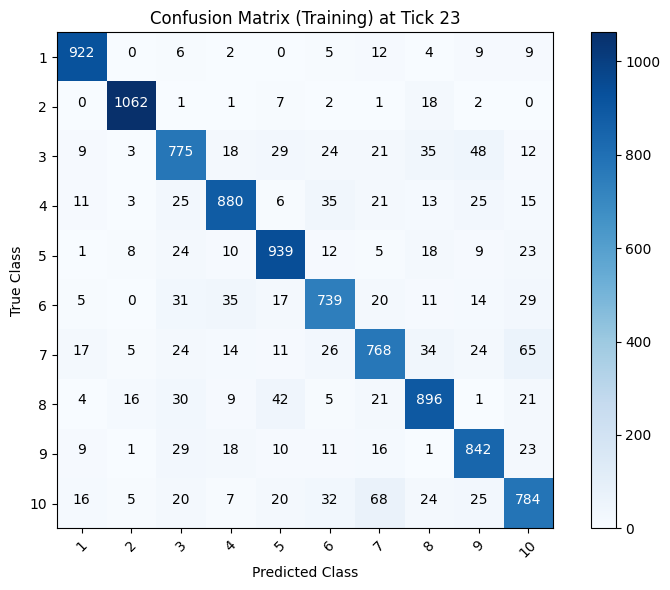

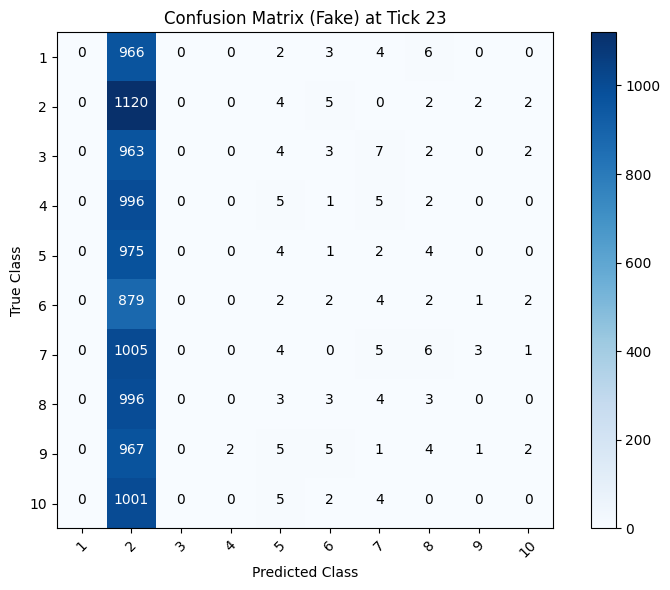

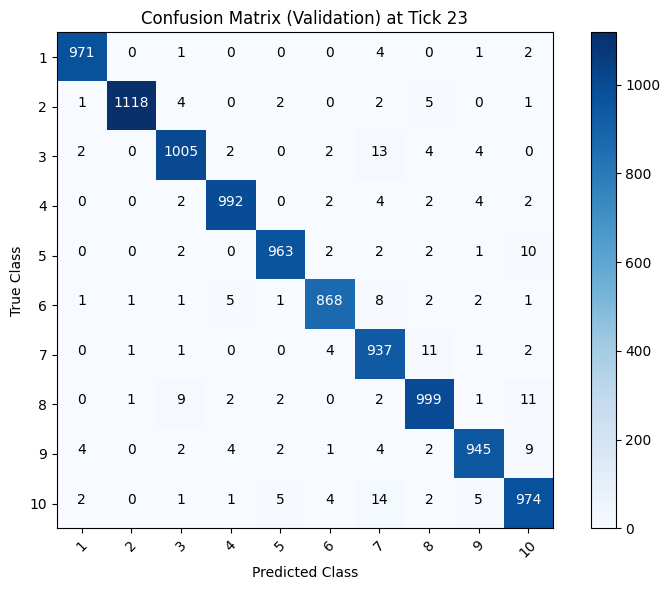

In [13]:
best_tick = int(best_tick_performance["tick"])
confusion_matrix = extract_confusion_matrix(
    jsonl_data, class_labels=class_labels, progress_tick=best_tick, data_type="real"
)
plot_confusion_matrix(
    confusion_matrix, class_labels=class_labels, title=f"Confusion Matrix (Training) at Tick {best_tick}"
)
confusion_matrix = extract_confusion_matrix(
    jsonl_data, class_labels=class_labels, progress_tick=best_tick, data_type="fake"
)
plot_confusion_matrix(confusion_matrix, class_labels=class_labels, title=f"Confusion Matrix (Fake) at Tick {best_tick}")
confusion_matrix = extract_confusion_matrix(
    jsonl_data, class_labels=class_labels, progress_tick=best_tick, data_type="val"
)
plot_confusion_matrix(
    confusion_matrix, class_labels=class_labels, title=f"Confusion Matrix (Validation) at Tick {best_tick}"
)